In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ganja.plotting as plotting

import matplotlib
matplotlib.style.use('seaborn-poster')

In [79]:
df0 = pd.read_hdf('log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid10.hd5')
df = pd.read_hdf('log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_5k_10.hd5')

Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid10.hd5 in read-only mode
Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_5k_10.hd5 in read-only mode


In [80]:
df.columns

Index(['eta', 'npu', 'phi', 'pred_maja', 'pred_mina', 'pred_ptD', 'pred_ring0',
       'pred_ring1', 'pred_ring2', 'pred_ring3', 'pred_ring4', 'pred_tau1',
       'pred_tau2', 'pred_tau21', 'pred_tau3', 'pred_tau32', 'pred_total',
       'pt', 'reco_maja', 'reco_mina', 'reco_ptD', 'reco_ring0', 'reco_ring1',
       'reco_ring2', 'reco_ring3', 'reco_ring4', 'reco_tau1', 'reco_tau2',
       'reco_tau21', 'reco_tau3', 'reco_tau32', 'reco_total'],
      dtype='object')

In [81]:
df['pt']

0         99.360817
1        399.128540
2        192.176437
3        213.608154
4        618.270691
5        647.398376
6        610.709717
7         64.262466
8        599.320618
9        105.696838
10        29.867369
11        29.311991
12       108.762619
13       535.102051
14        67.378471
15       696.863586
16       655.348206
17       319.927582
18       140.043274
19       575.977356
20       411.121704
21        72.208160
22       652.354919
23       172.659332
24        60.830585
25       107.041794
26      1011.197815
27        37.016895
28       853.553772
29        27.095406
           ...     
4970     294.546051
4971     478.639191
4972     160.087097
4973     171.614975
4974    1695.374146
4975      94.125320
4976      94.098015
4977     130.407562
4978     434.539734
4979    1428.803589
4980      37.901791
4981      66.700562
4982     709.418030
4983     561.159424
4984     499.430939
4985     546.817139
4986    2147.119629
4987     360.768677
4988     998.751648


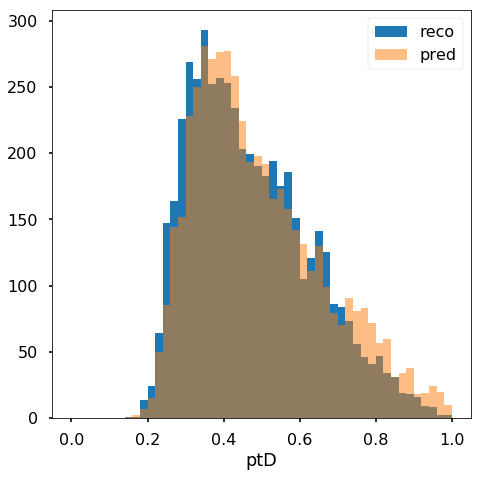

In [83]:
plotting.distrib_metric(df['reco_ptD'],df['pred_ptD'],xlabel="ptD",bins=50,range=[0,1])

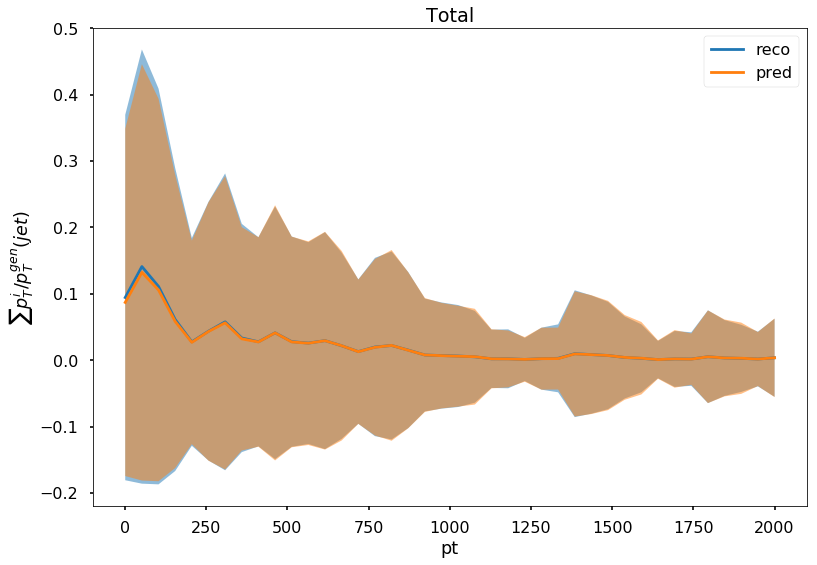

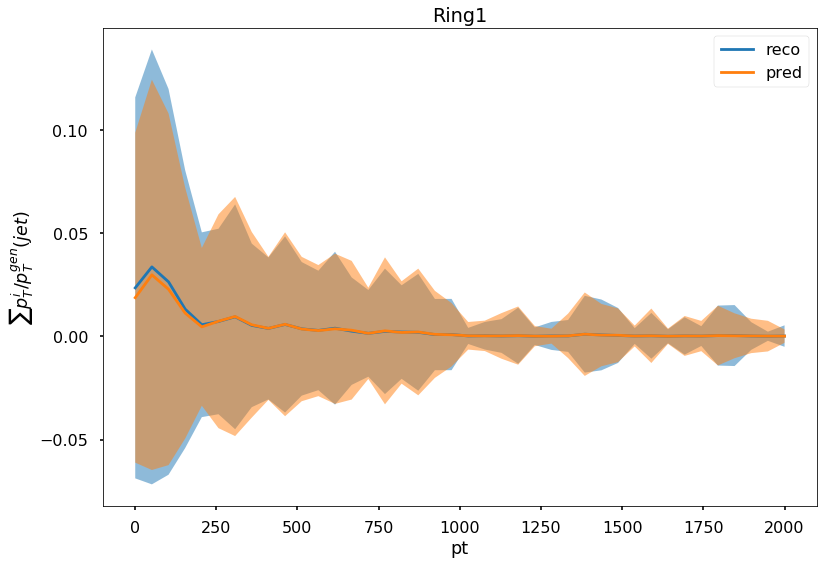

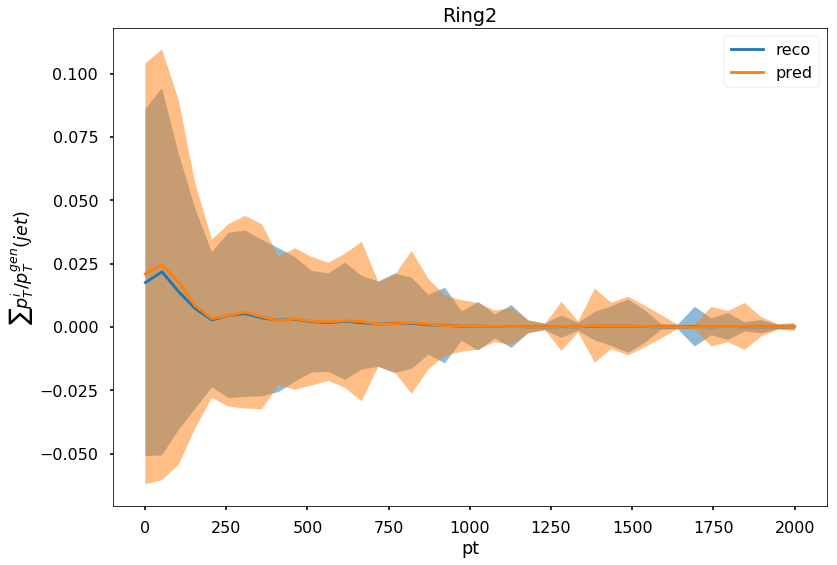

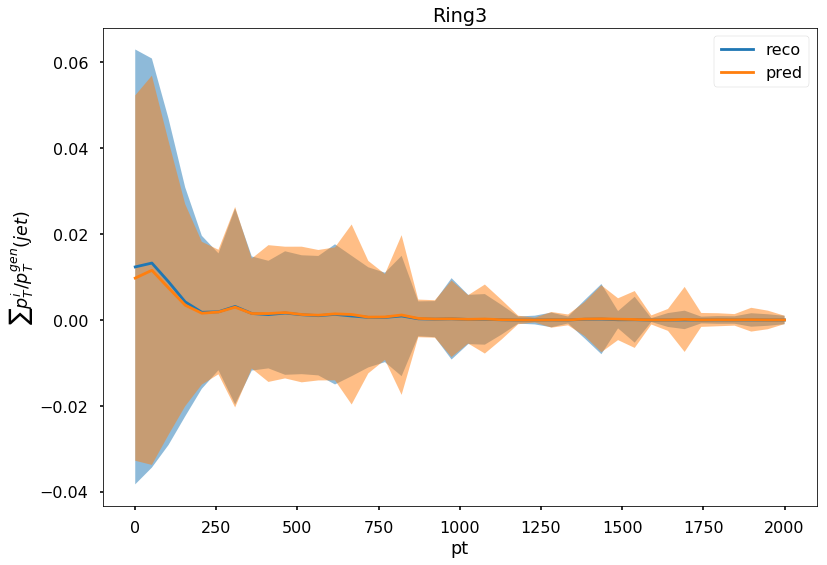

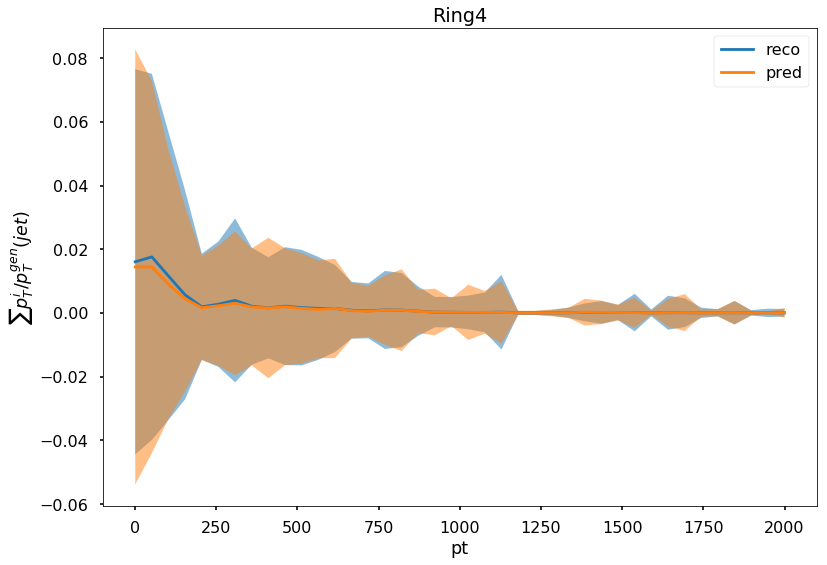

In [84]:
plotting.show_moments(df['reco_total'].as_matrix(),df['pred_total'].as_matrix(),df['pt'],np.linspace(1,2000,40),xlabel='pt',title='Total')
plt.show()
plotting.show_moments(df['reco_ring1'].as_matrix(),df['pred_ring1'].as_matrix(),df['pt'],np.linspace(1,2000,40),xlabel='pt',title='Ring1')
plt.show()
plotting.show_moments(df['reco_ring2'].as_matrix(),df['pred_ring2'].as_matrix(),df['pt'],np.linspace(1,2000,40),xlabel='pt',title='Ring2')
plt.show()
plotting.show_moments(df['reco_ring3'].as_matrix(),df['pred_ring3'].as_matrix(),df['pt'],np.linspace(1,2000,40),xlabel='pt',title='Ring3')
plt.show()
plotting.show_moments(df['reco_ring4'].as_matrix(),df['pred_ring4'].as_matrix(),df['pt'],np.linspace(1,2000,40),xlabel='pt',title='Ring4')
plt.show()